<a href="https://colab.research.google.com/github/ShutSV/data-science-1/blob/main/2023_12_16_hw6_1_%D0%A8%D1%83%D1%82_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1: Основы работы с данными
Создайте текстовый файл с данными и прочитайте его в Python.
Изучите разные типы данных в Python (int, float, str, list, dictionary) и создайте переменные разных типов.
Выполните агрегацию данных (например, вычислите среднее значение чисел в списке).
Преобразуйте данные из одного типа в другой (например, преобразуйте строку в число и наоборот).
Создайте график на основе данных с использованием библиотеки Matplotlib.

In [ ]:
!pip install openpyxl

In [ ]:
import os
from sample_data.io_files import create, read, save


# запрос имени файла
file_path = input("Введите имя файла с расширением (*.txt, *.csv, *.xlsx): ")

# проверка существования файла
if not os.path.exists(file_path):
    create(file_path)
else:
    print("Такой файл существует")


# подтверждение действий
def confirm(ask: str) -> bool:
    usr_choice = input(f"{ask}(y/n): ")
    while usr_choice not in ["Y", "y", "N", "n"]:
        usr_choice = input(f"{ask} (y/n): ")
    if usr_choice in ["Y", "y"]:
        return True
    return False


# получение свойств файла, включая его содержимое
input_file = read(file_path)
content_file = input_file[0]
inf_file = input_file[1]
print(f"Информация о файле: в файле строк/записей: {inf_file}")
if confirm("Вывести содержимое файла на экран?"):
    for row in content_file:
        print(row)

# добавление информации в файл
if confirm("Дополнить содержимое файла?"):
    add_object = input("Введите список значений через запятую: ").split(", ")
    save(file_path, [inf_file + 1] + add_object)

print("Программа завершена")


Введите имя файла с расширением (*.txt, *.csv, *.xlsx): test.txt
Файл создан
Информация о файле: в файле строк/записей: 0
Вывести содержимое файла на экран?(y/n): y
Дополнить содержимое файла?(y/n): y
Введите список значений через запятую: Ехали медведи на велосипеде

Файл обновлен
Программа завершена


In [ ]:
!pip install matplotlib

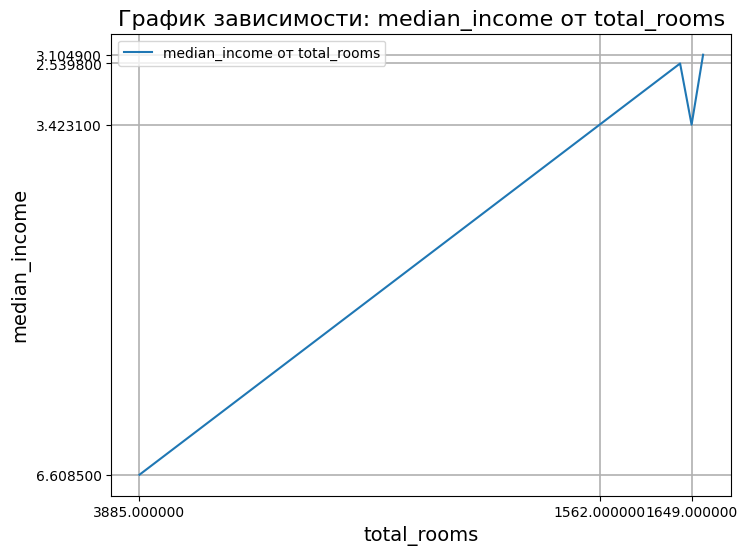

In [1]:
import os
import csv
import matplotlib.pyplot as plt
from matplotlib import ticker

# загрузка данных из файла CSV, без перевода в DataFrame
file_path = "test0.csv"
if not os.path.exists(file_path):
    print("Такой файл не существует")

# попытка получить данные
try:
    with open(file_path, "r") as file:
        content = csv.reader(file)
        out = []
        for _ in content:
            out.append(_)
except Exception as e:
    print("Ошибка чтения из файла", e)

# X и Y, выбор колонок в данных
# Датасет о стоимости жилья в Калифорнии за 1990 год
# 0 longitude - как далеко на запад находится дом
# 1 latitude - как далеко на север находится дом
# 2 housingMedianAge - Средний возраст дома в блоке/квартале; меньшее число - это более новое здание
# 3 totalRooms - Общее количество комнат в блоке/квартале
# 4 totalBedrooms - Общее количество спален в блоке/квартале
# 5 population - Общее количество людей, проживающих в блоке/квартале
# 6 households - Общее количество домохозяйств, группа людей, проивающих в квартирах, для домашнего блока
# 7 medianIncome - Средний доход для домохозяйств в блоке домов (измеряется в десятках тысяч долларов США)
# 8 medianHouseValue - Средняя стоимость дома для домохозяйств в пределах блока (измеряется в долларах США)
num_x = 3
label_x = out[0][num_x]
num_y = 7
label_y = out[0][num_y]

# превращение данных в координаты графика
# и ограничение графика первыми 50 строками (отсекая заголовки)
x = []
y = []
for i in range(1, 51):
    x.append(out[i][num_x])
    y.append(out[i][num_y])

# компоновка графика
fig, ax = plt.subplots(figsize=(8, 6))

# настройки графика
ax.set_title(f"График зависимости: {label_y} от {label_x}", fontsize=16)
ax.set_xlabel(label_x, fontsize=14)
ax.set_ylabel(label_y, fontsize=14)
ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.plot(x, y, label=f"{label_y} от {label_x}")
ax.legend()

ax.xaxis.set_major_locator(ticker.FixedLocator([0, 40, 48]))
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 40, 47, 48]))

# вывод графика
plt.show()